In [59]:
import os
import numpy as np
import xarray as xr

import cartopy.feature as cf
import cartopy.crs as ccrs

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import sys
sys.path.insert(0, os.path.abspath("../function"))
from ART_preprocessing import create_box, space_time_scales_agregations, wet_matrix_extrapolation
from ART_plot import plot_wet_fraction_matrix

In [2]:
dir_base = os.path.join('/','media','arturo','Arturo','Data','Italy','Satellite')

In [5]:
dir_data = os.path.join(dir_base,'PERSIANN','1dy','PERSIANN_Italy_1dy_2000_01_01_2023_12_31.nc')
PRE_daily = xr.open_dataset(dir_data)
PRE_daily

<xarray.Dataset> Size: 88MB
Dimensions:  (time: 8766, lat: 48, lon: 52)
Coordinates:
  * time     (time) datetime64[ns] 70kB 2000-01-01 2000-01-02 ... 2023-12-31
  * lat      (lat) float32 192B 47.88 47.62 47.38 47.12 ... 36.62 36.38 36.12
  * lon      (lon) float32 208B 6.125 6.375 6.625 6.875 ... 18.38 18.62 18.88
Data variables:
    PRE      (time, lat, lon) float32 88MB ...
Attributes:
    description:  PERSIANN daily data for Italy region

In [53]:
dt = 1 # days
npix = 3
radio = 0.25
tmax = 10 # days
L1 = 25
thresh = 1
ninterp = 2000

lat_c = 46
lon_c = 12

In [44]:
box_3h, _ = create_box(PRE_daily, lat_c, lon_c, npix, radio)
print(f'Size of box: {box_3h.data.shape}')

Size of box: (3, 3, 8766)


In [45]:
smax = box_3h.shape[0]
tscales = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])*dt
tscales = tscales[tscales < tmax + 0.001]
xscales = np.arange(1, smax+1)
xscales_km = xscales*L1

In [46]:
len(xscales), len(tscales)

(3, 10)

In [47]:
WET_MATRIX = space_time_scales_agregations(
                box_3h, 
                L1, 
                'OVERLEAP', 
                tscales, 
                xscales, 
                npix, 
                thresh)

neihgborhood area: 3x3


In [57]:
ntscales = np.size(tscales)
nxscales = np.size(xscales)

tscales_INTER = np.linspace(np.min(tscales), np.max(tscales), ninterp)
WET_MATRIX_INTER = np.zeros((ninterp, nxscales))

for col in range(nxscales):
    WET_MATRIX_INTER[:, col] = np.interp(tscales_INTER, tscales, WET_MATRIX[:, col])

WET_MATRIX_EXTRA, new_spatial_scale = wet_matrix_extrapolation(
                WET_MATRIX_INTER, 
                xscales_km, 
                tscales_INTER, 
                L1, 
                npix)

In [60]:
origin_ref = [25, 1]
target_ref = [0, 1]

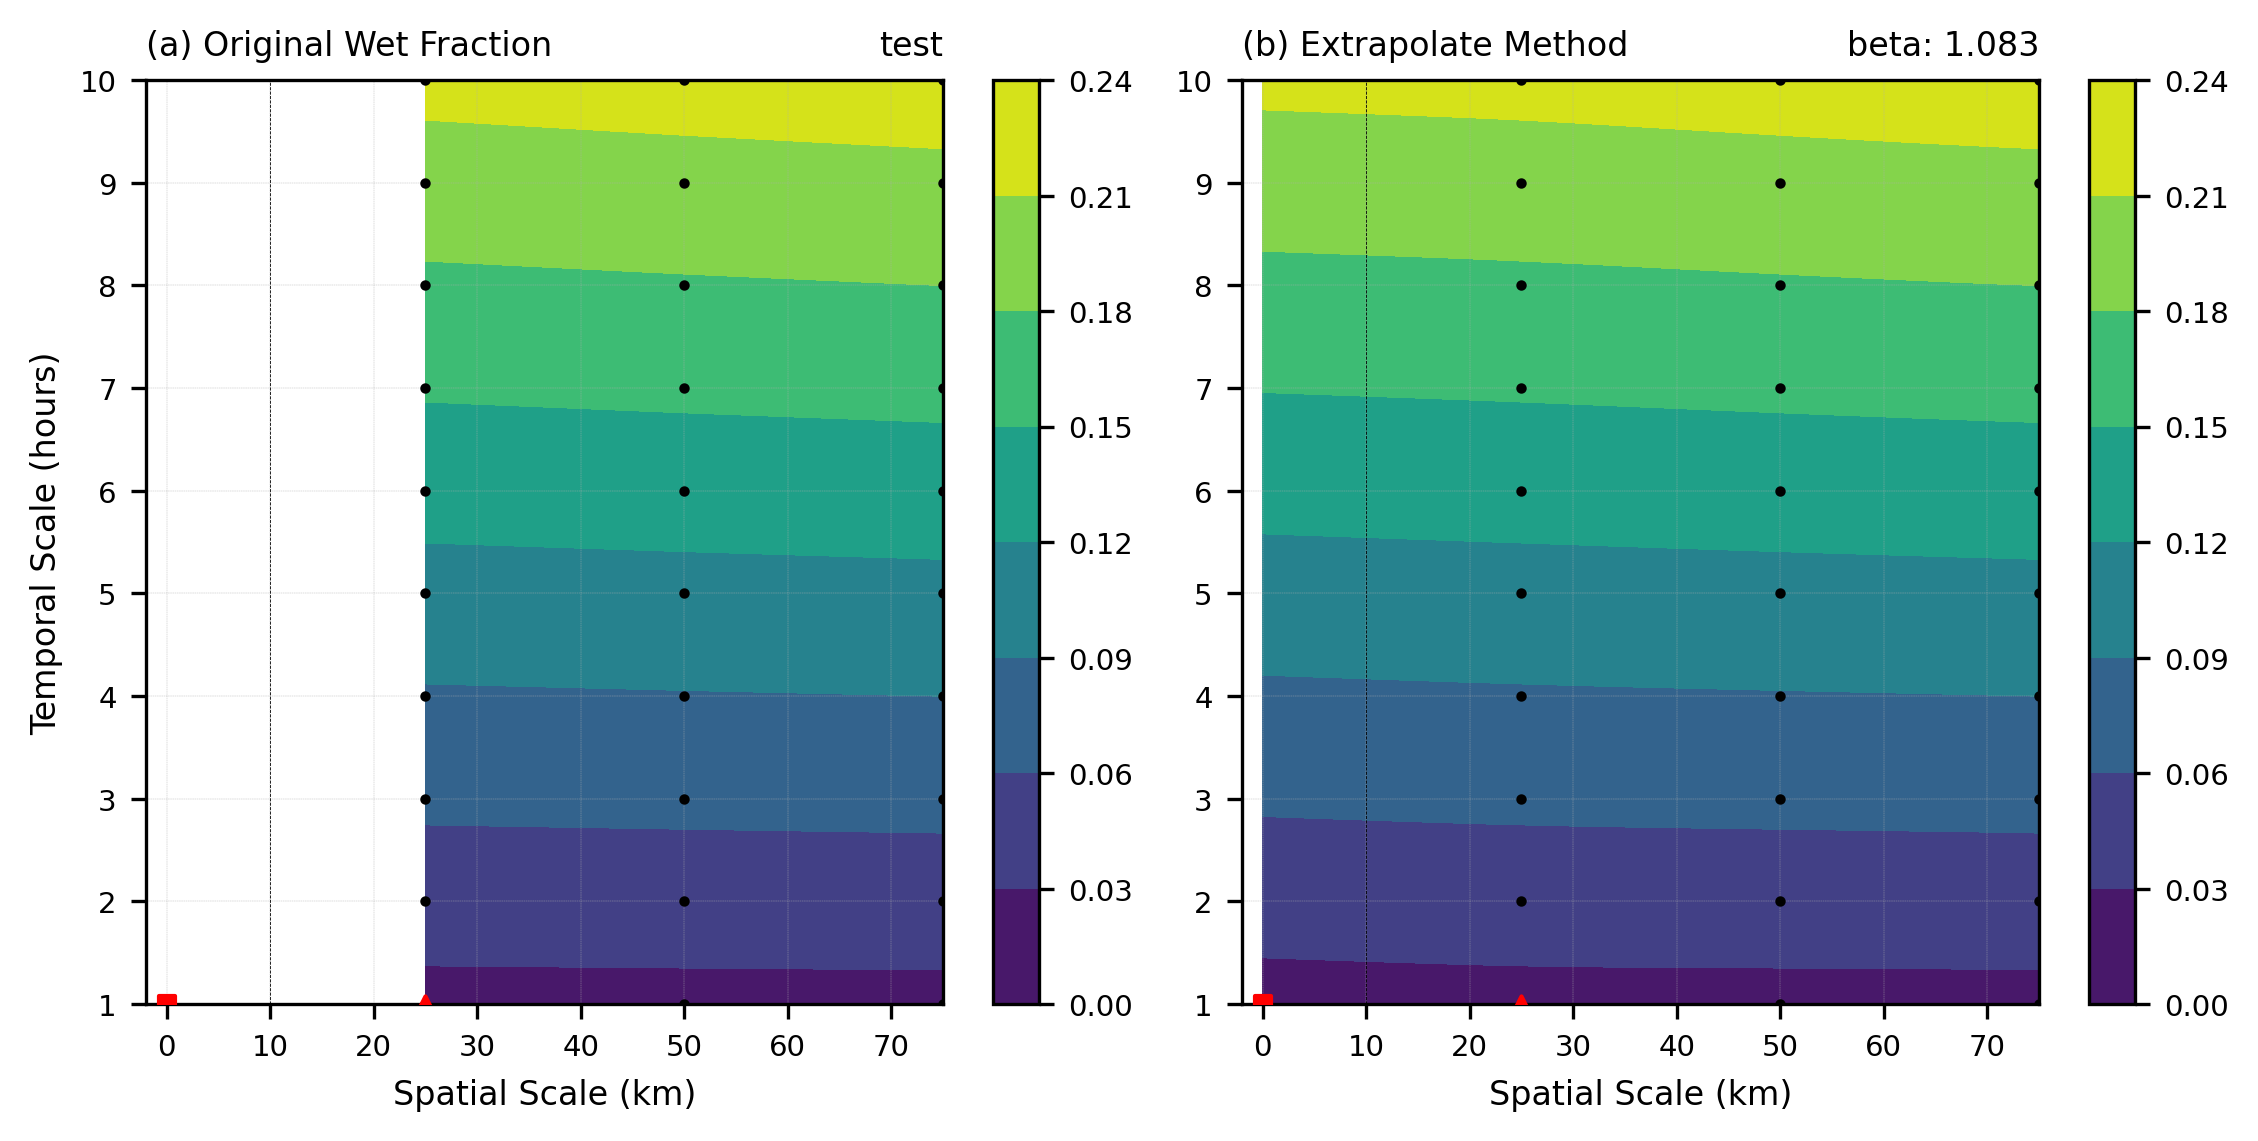

In [61]:
plot_wet_fraction_matrix(
                WET_MATRIX_INTER, 
                xscales_km, tscales, tscales_INTER, 
                WET_MATRIX_EXTRA, 
                new_spatial_scale, 
                origin_ref, target_ref, 
                'test', 'jeje', save=False)

In [ ]:
# The idea is compare two products with same spatial resolution, one with 3h and the other with 1dy
# Other idea is compare the same product but with agregation time from 3h to 1dy